In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# loading data

import io
df=pd.read_csv('top_insta_influencers_data.csv')
print('CSV loaded')

CSV loaded


In [5]:
# check the data
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [7]:
# according to above data is represented by 10 features and 200 users
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [11]:
df=df.set_index('rank')

In [13]:
# function to convert to number

def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return int(1000*float(value.replace('k','').strip()))
        elif 'm' in value:
            return 1000000*float(value.replace('m','').strip()) 
        elif 'b' in value:
            return 1000000000*float(value.replace('b','').strip())
        else:
            return int(float(value))
    return value

columns_to_convert=['posts', 'followers', 'total_likes']

for column in columns_to_convert:
    df[column]=df[column].apply(convert_to_number)

post1=list(df['posts'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    int64  
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    object 
 5   60_day_eng_rate    200 non-null    object 
 6   new_post_avg_like  200 non-null    object 
 7   total_likes        200 non-null    float64
 8   country            138 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 15.6+ KB


In [17]:
# drop 4,5,6

df.drop(['avg_likes', '60_day_eng_rate', 'new_post_avg_like'], axis=1, inplace=True)

In [19]:
# after dropping
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   channel_info     200 non-null    object 
 1   influence_score  200 non-null    int64  
 2   posts            200 non-null    int64  
 3   followers        200 non-null    float64
 4   total_likes      200 non-null    float64
 5   country          138 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 10.9+ KB


,channel_info,influence_score,posts,followers,total_likes,country
rank,,,,,,
1,cristiano,92,3300,475800000.0,2.900000e+10,Spain
2,kyliejenner,91,6900,366200000.0,5.740000e+10,United States
3,leomessi,90,890,357300000.0,6.000000e+09,NaN
4,selenagomez,93,1800,342700000.0,1.150000e+10,United States
5,therock,91,6800,334100000.0,1.250000e+10,United States
...,...,...,...,...,...,...
196,iambeckyg,71,2300,33200000.0,1.400000e+09,United States
197,nancyajram,81,3800,33200000.0,1.500000e+09,France
198,luansantana,79,770,33200000.0,1.492000e+08,Brazil


In [21]:
# EDA
df.describe()

,influence_score,posts,followers,total_likes
count,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,81.820000,3499.850000,7.740950e+07,3.658112e+09
std,8.878159,3475.828158,7.368727e+07,5.561939e+09
min,22.000000,10.000000,3.280000e+07,1.830000e+07
25%,80.000000,947.500000,4.000000e+07,9.968500e+08
50%,84.000000,2100.000000,5.005000e+07,2.000000e+09
75%,86.000000,5025.000000,6.890000e+07,3.900000e+09
max,93.000000,17500.000000,4.758000e+08,5.740000e+10


In [23]:
# hypotheses: in all features there are insignificant outliers both in terms of minimum and maximum values (to be tested later)

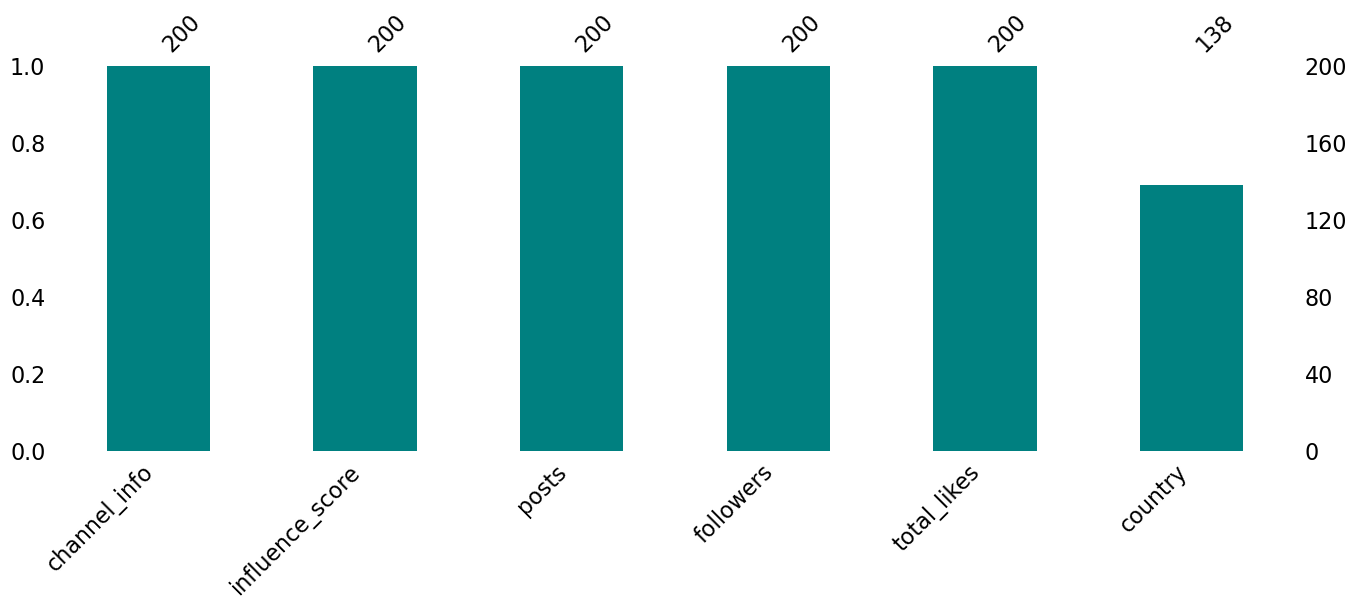

In [25]:
# check the dataset for gaps in data

msno.bar(df, figsize=(16,5), color="#008080")
plt.show()

In [27]:
# country appears to have some missing values, so I'll replace them with the default value Unknown

df_clean = df.dropna(subset=['country'])
print('Successfully dropped')

Successfully dropped


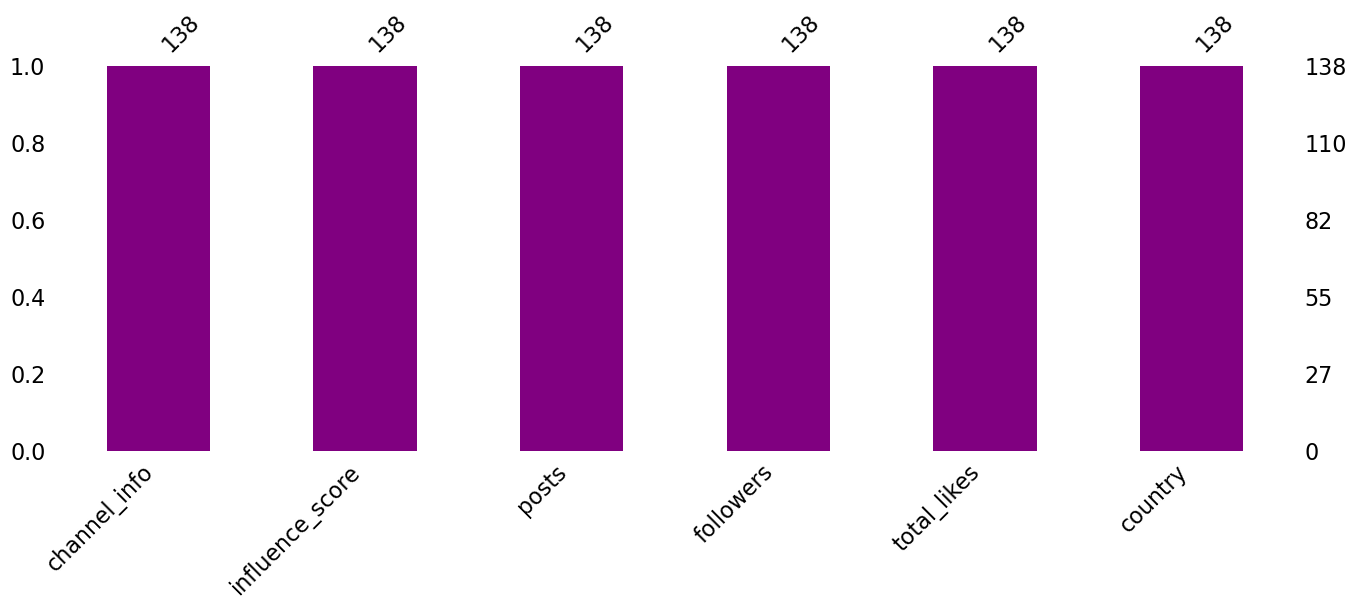

In [29]:
# check that there are no gaps now
msno.bar(df_clean, figsize=(16,5), color="#800080")
plt.show()

In [31]:
# check data for the presence of categorical features

for column_name in df_clean.columns:
    unique_values=len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name=column_name,unique_values=unique_values))

Feature 'channel_info' has '200' unique values
Feature 'influence_score' has '32' unique values
Feature 'posts' has '99' unique values
Feature 'followers' has '165' unique values
Feature 'total_likes' has '116' unique values
Feature 'country' has '26' unique values


In [33]:
# feature country is categorical, the rest should be classificed as continuous 
# remove the duplicate US value

In [35]:
df_clean['country'].unique()

array(['Spain', 'United States', 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [37]:
df_clean.loc[df['country']=='United States','country']='United States'
print('duplicates removed')

duplicates removed


In [39]:
# according to the above the largest number of top bloggers are located in USA. Then Brazil, followed by India.
# There is a large amount of Unknwons due to the missing values in our dataset.

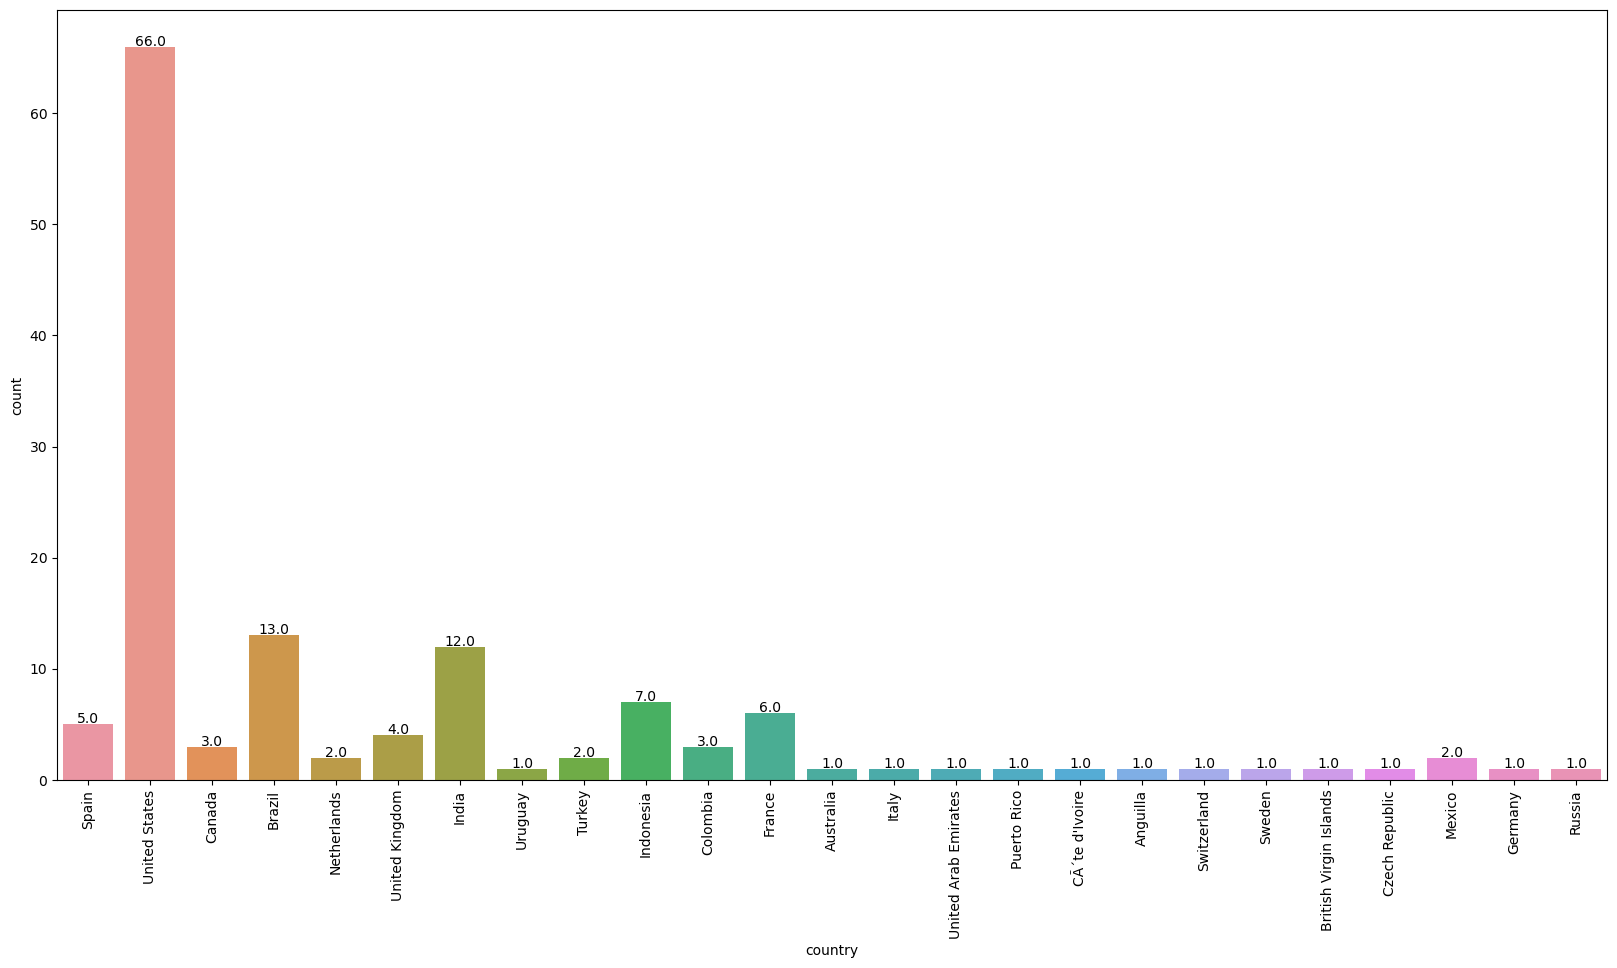

In [41]:
# graph to distribute categorical feature

fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'country' , data=df_clean)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [43]:
# the largest number of bloggers are in the USA, due to active socio-cultural position of this country)
# USA is followed by Brazil and India (large populations)
# China is absent, perhaps due to the high level of state censorshop and high prevalence of local social networks

In [45]:
# let's evaluate continuous features

df_clean.columns

Index(['channel_info', 'influence_score', 'posts', 'followers', 'total_likes',
       'country'],
      dtype='object')

In [47]:
num_features=['influence_score', 'posts', 'followers','total_likes'] #total_likes in B, followers in M

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


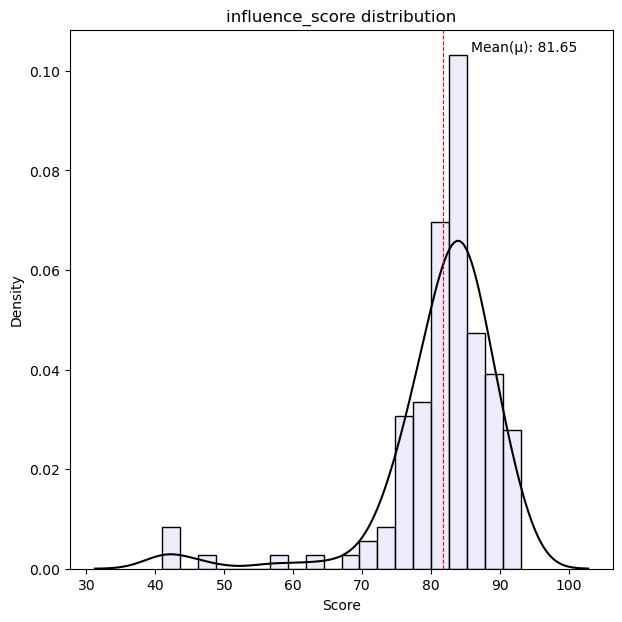

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


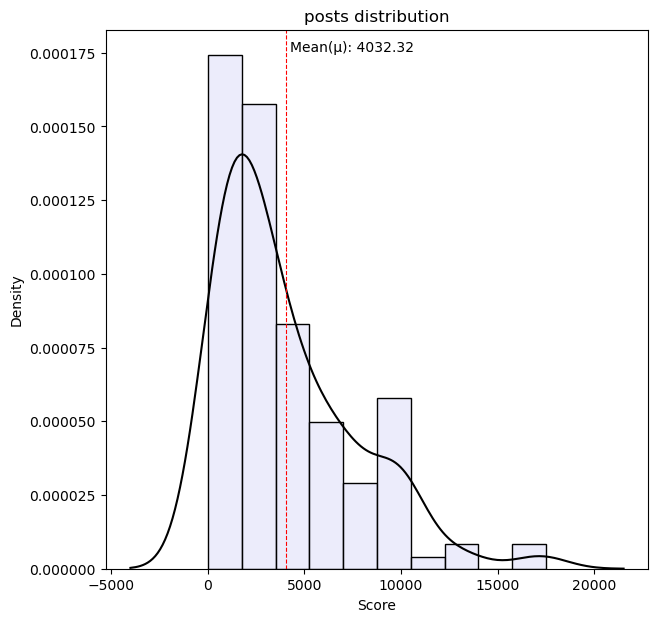

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


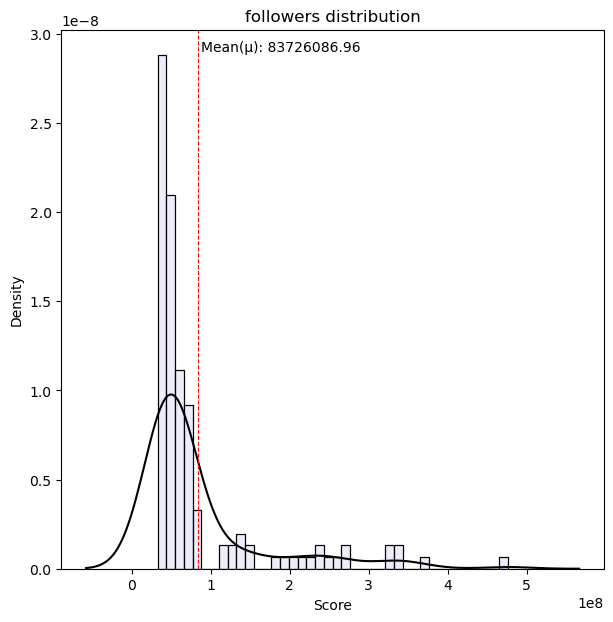

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


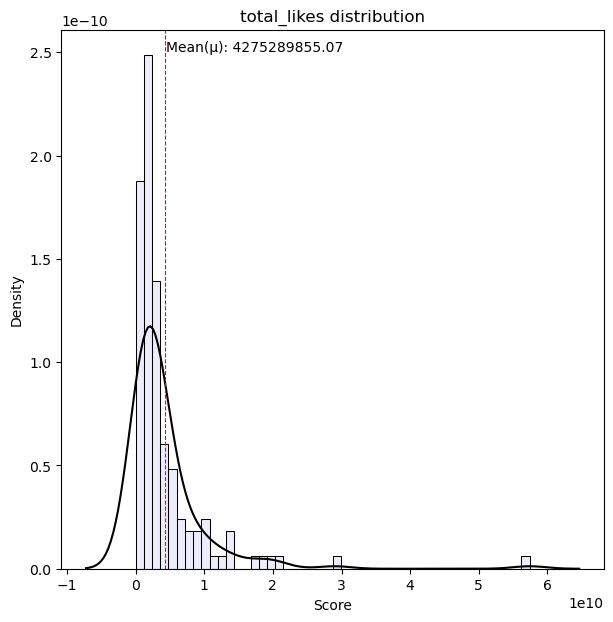

In [49]:
for column_name in num_features:
    plt.figure(figsize=(7,7))
    plt.title("{column_name} distribution".format(column_name=column_name))
    sns.histplot(df_clean[column_name], stat='density', color='#E6E6FA')
    sns.kdeplot(df_clean[column_name], color='black')
    plt.axvline(df_clean[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
    min_ylim, max_ylim=plt.ylim()
    plt.text(df_clean[column_name].mean()*1.05, max_ylim*0.96, 'Mean(μ): {:.2f}'.format(df_clean[column_name].mean()))
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.show()

In [ ]:
# according to the above, distributions are very different from normal (statistical tests to be conducted later on to test this hypothesis)

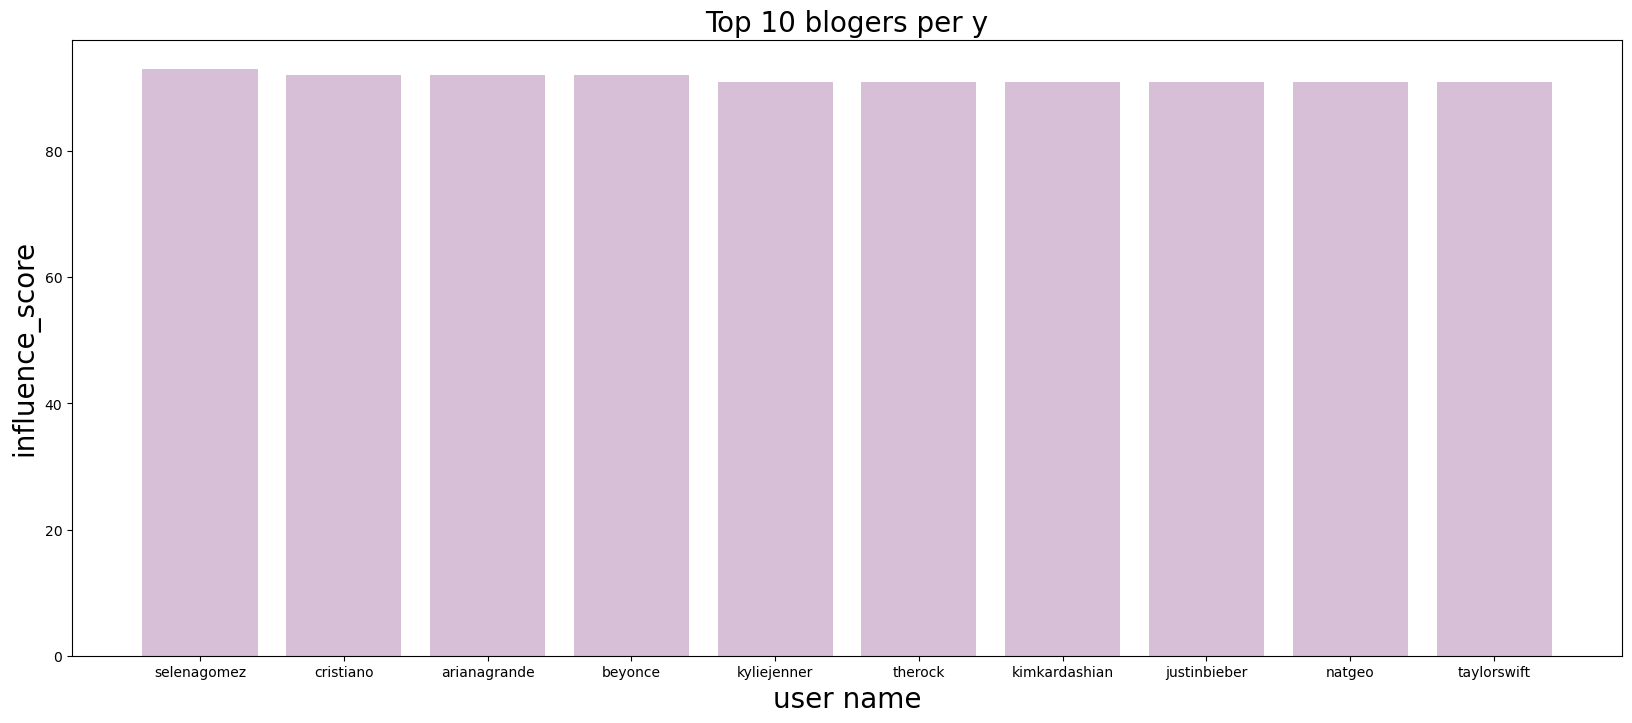

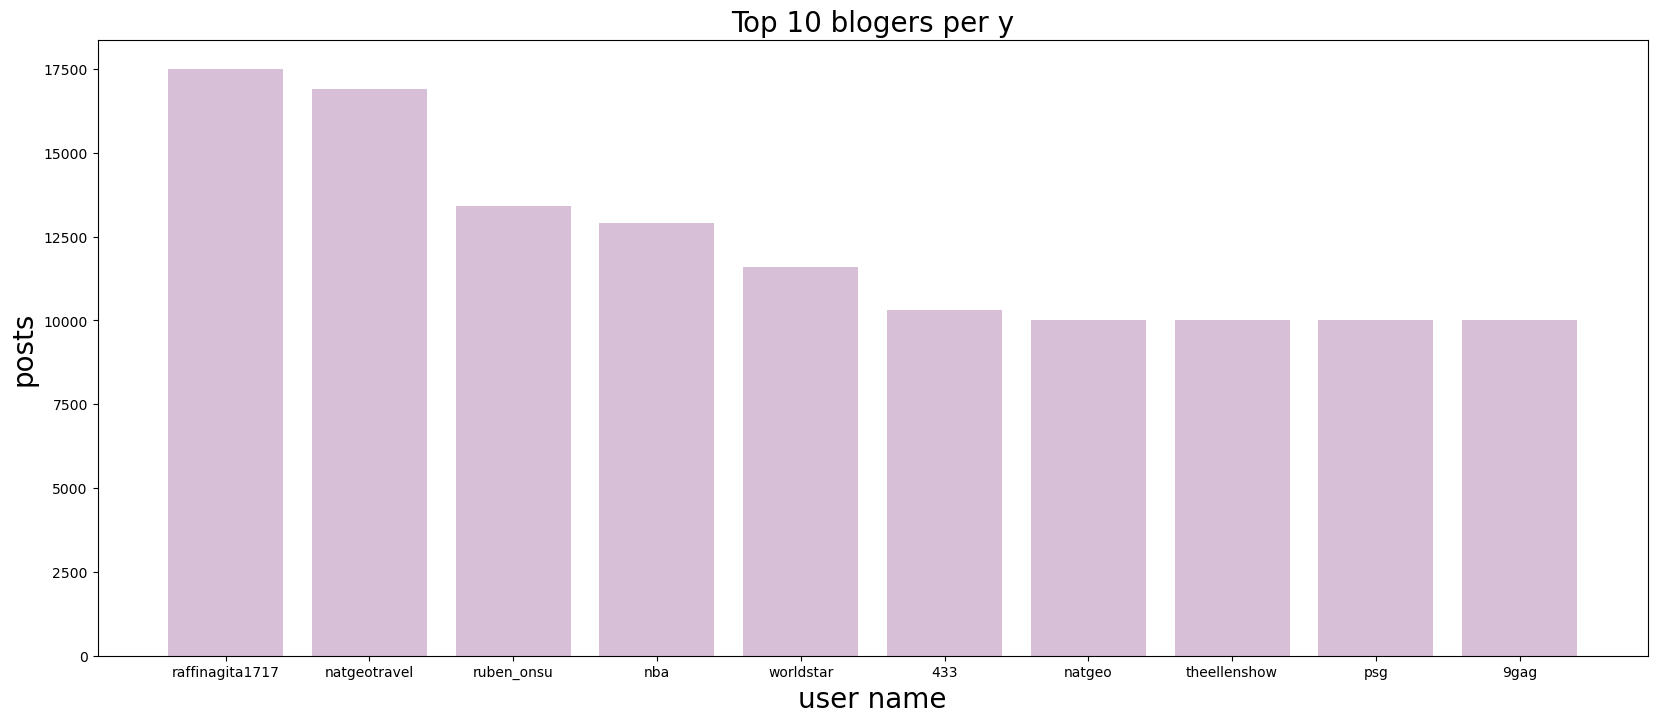

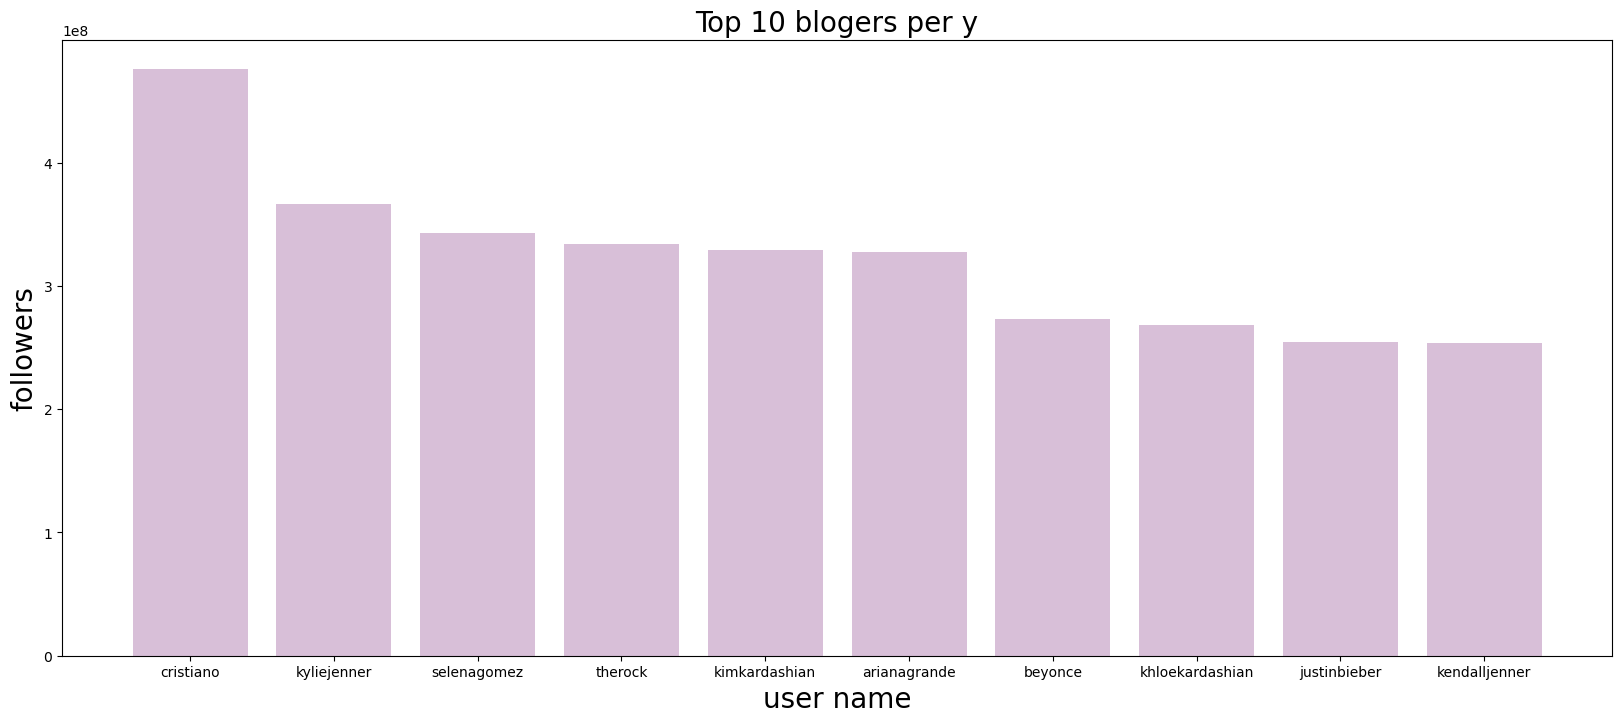

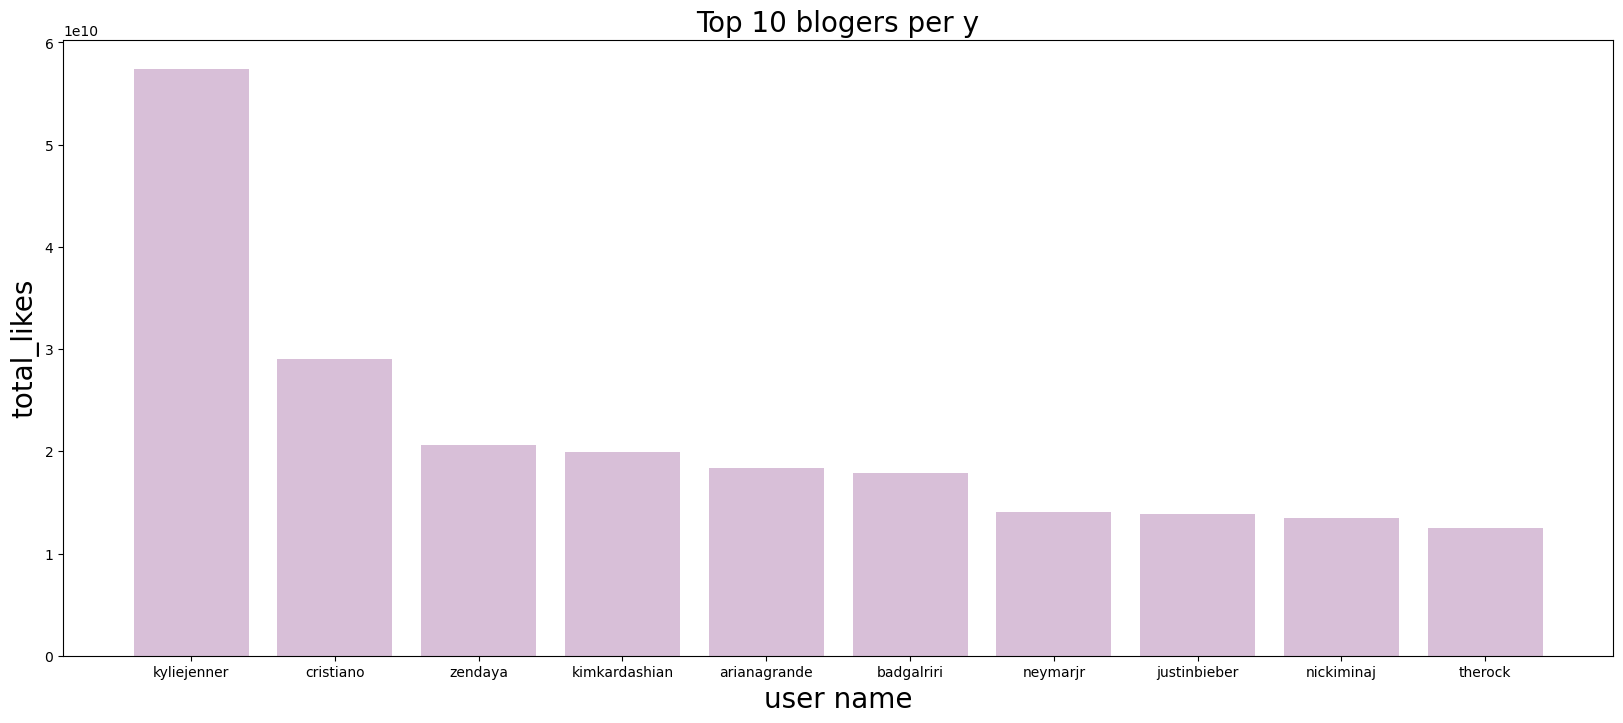

In [51]:
# display top 10 bloggers by various parameters

for column in num_features:
    top10=df_clean.nlargest(10,column)
    plt.figure(figsize=(20,8))
    plt.bar(top10['channel_info'], top10[column],color="#D8BFD8")
    plt.ylabel(column,fontsize=20)
    plt.xlabel('user name', fontsize=20)
    plt.title("Top 10 blogers per y", fontsize=20)

In [53]:
# film actors, singers, photo models, footballers....

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

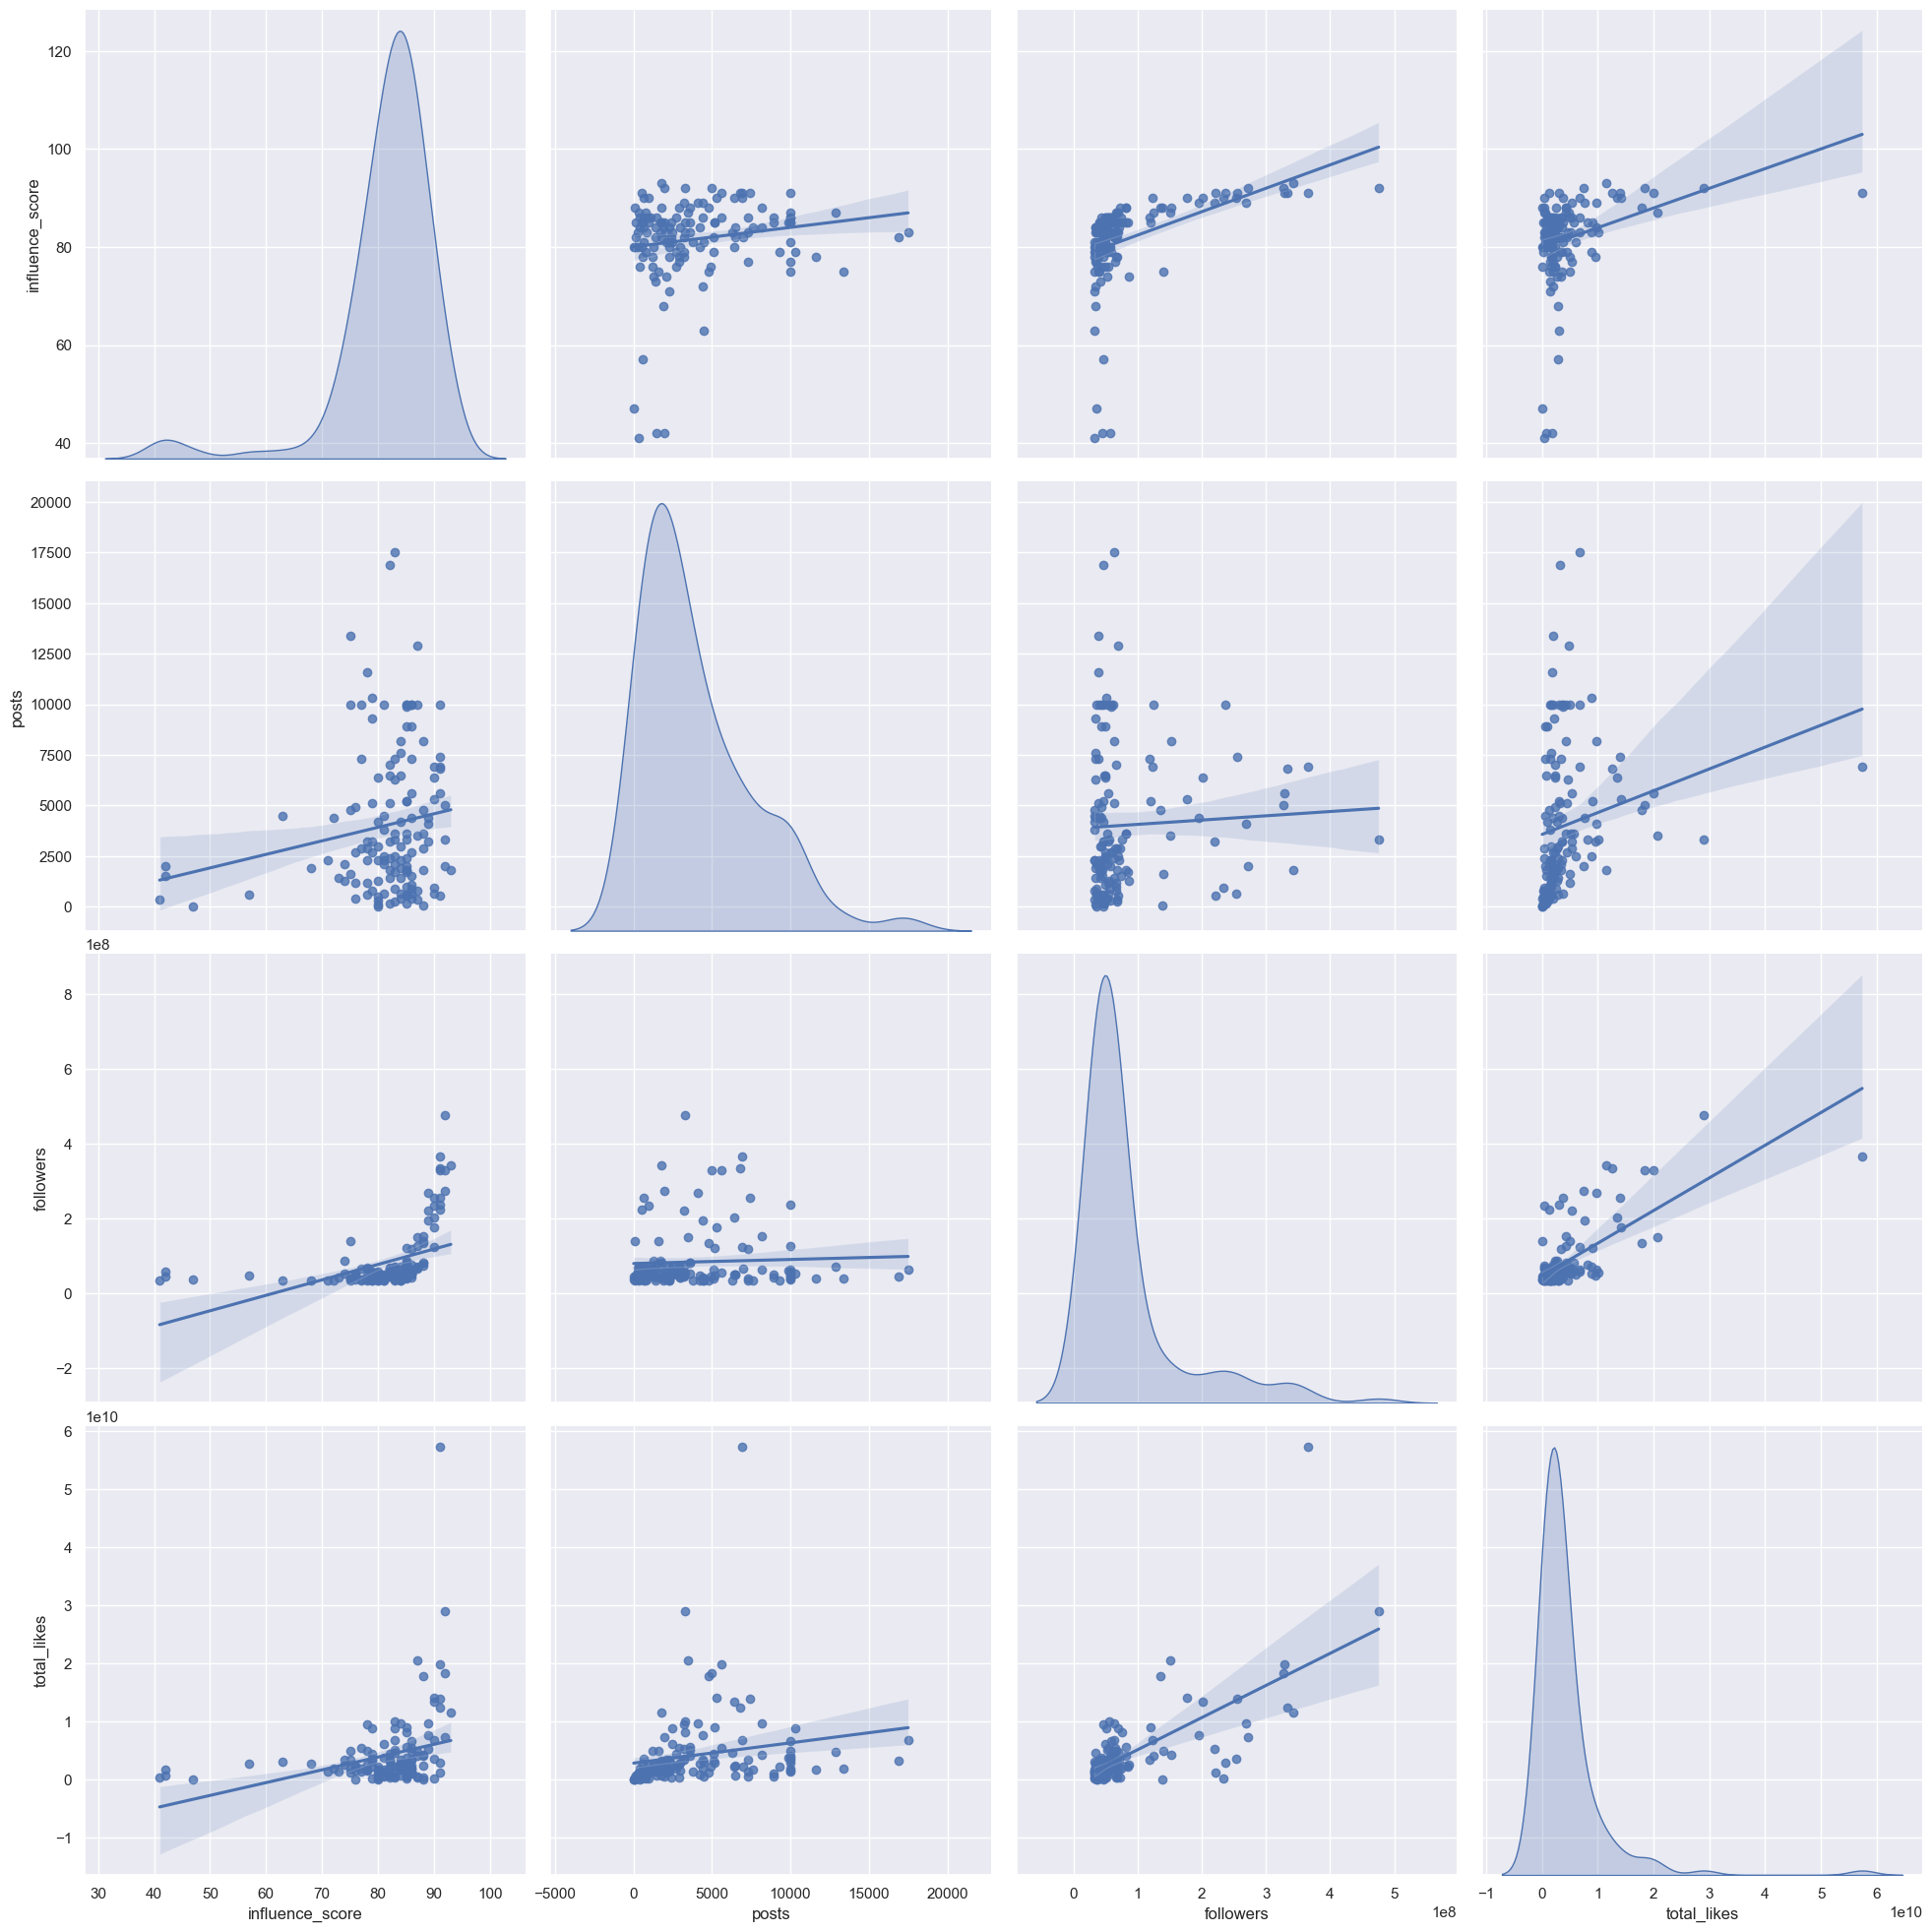

In [55]:
# let's look at the relationship between the various features

sns.set()
sns.pairplot(df_clean,height=5,kind='reg',diag_kind='kde')
plt.show()

In [57]:
# according to above, there is a positive correlaction between many studied parameters:
    #posts-total_likes
    #posts-followers
    #posts-influence_score
    #followers-influence_score

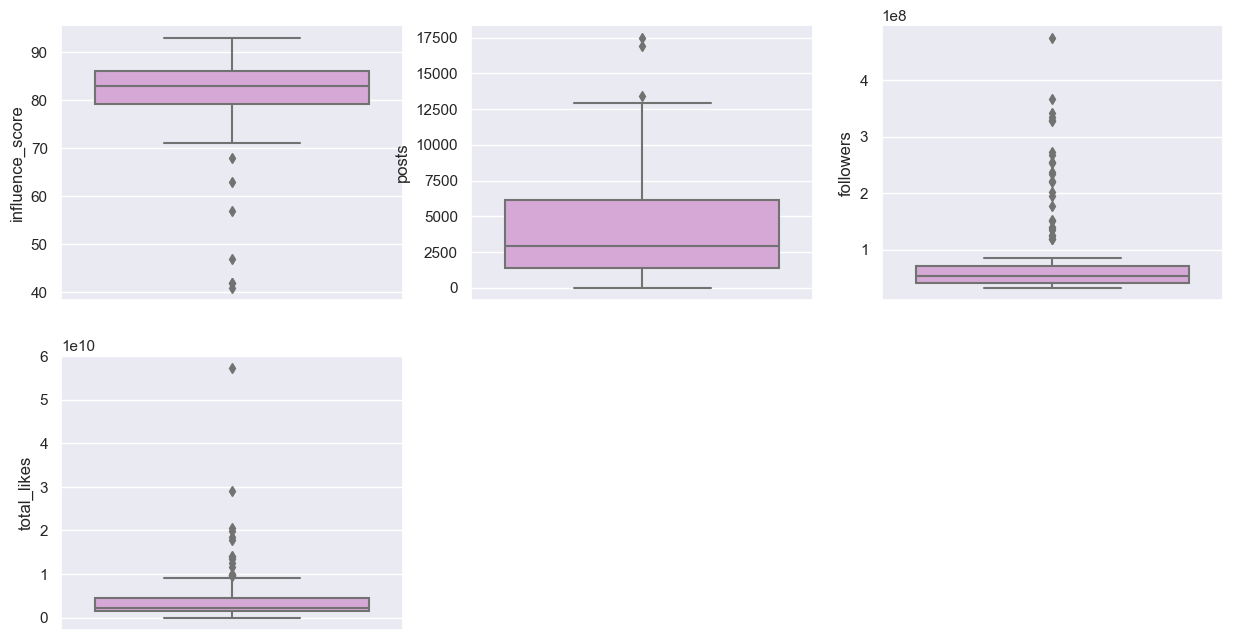

In [59]:
# there are also outliers. Since the dataset is small size, removing outliers is impractical
# instead, I'll display the outliers as boxplots

i=1
plt.figure(figsize=(15,25))
for feature in num_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=df_clean[feature], color='#DDA0DD')
    i+=1

In [61]:
# continue to stats analysis
# we will delete user's nickname and convert the country to a rank: ranl 1 is USA, rank 2 are conutries where the number of bloggers
# is more than one and rank 3 are all the rest

country=list(df_clean['country'])
country1=list()
for val in country:
    if country.count(val)>10:
        country1.append(1)
    elif 10>=country.count(val)>1:
        country1.append(2)
    else:
        country1.append(3)

In [63]:
df_clean['country_rank']=country1

/var/folders/0_/0_9tgql52_jcvwc6rlwbddn00000gn/T/ipykernel_17251/2733864150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country_rank']=country1


In [65]:
df_clean.drop('country', axis=1, inplace=True)

/var/folders/0_/0_9tgql52_jcvwc6rlwbddn00000gn/T/ipykernel_17251/4149142174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('country', axis=1, inplace=True)


In [69]:
df_clean

,channel_info,influence_score,posts,followers,total_likes,country_rank
rank,,,,,,
1,cristiano,92,3300,475800000.0,2.900000e+10,2
2,kyliejenner,91,6900,366200000.0,5.740000e+10,1
4,selenagomez,93,1800,342700000.0,1.150000e+10,1
5,therock,91,6800,334100000.0,1.250000e+10,1
6,kimkardashian,91,5600,329200000.0,1.990000e+10,1
...,...,...,...,...,...,...
196,iambeckyg,71,2300,33200000.0,1.400000e+09,1
197,nancyajram,81,3800,33200000.0,1.500000e+09,2
198,luansantana,79,770,33200000.0,1.492000e+08,1


In [73]:
df_clean.drop('channel_info',axis=1,inplace=True)

/var/folders/0_/0_9tgql52_jcvwc6rlwbddn00000gn/T/ipykernel_17251/3257933182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('channel_info',axis=1,inplace=True)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

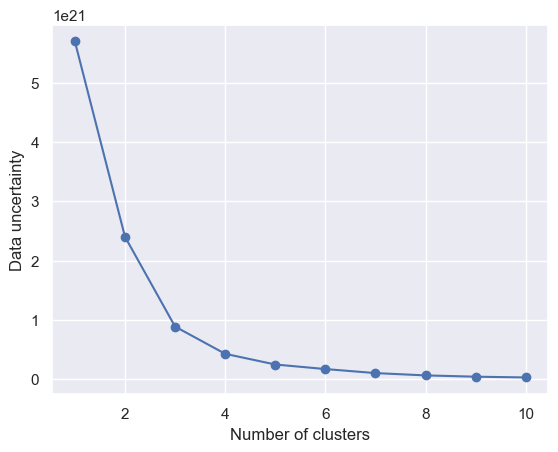

In [79]:
# cluster analysis 

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df_clean)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

In [81]:
# the optimal number of clusters is 4

In [87]:
# statistical tests

# we have to check the normality of distribution (as indicates above on histograms)
num_col=['influence_score', 'followers', 'total_likes', 'posts']

In [93]:
# we will use Shapiro-Wilk normality Test

from scipy.stats import shapiro
#normality test
for feature in num_col:
    stat,p=shapiro(df_clean[feature])
    print('Statistics=%.3f, p=%.3f' % (stat,p))

    #interpret
    alpha=0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.735, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.619, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.537, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.874, p=0.000
Sample does not look Gaussian (reject H0)


In [95]:
# reject the null hypothesis. 

In [97]:
# Spearman correlation matrix

correlation=df_clean.corr()
print(correlation['total_likes'].sort_values(ascending=False), '\n')

total_likes        1.000000
followers          0.694309
influence_score    0.297215
posts              0.193972
country_rank      -0.114023
Name: total_likes, dtype: float64 



Index(['total_likes', 'followers', 'influence_score', 'posts', 'country_rank'], dtype='object')


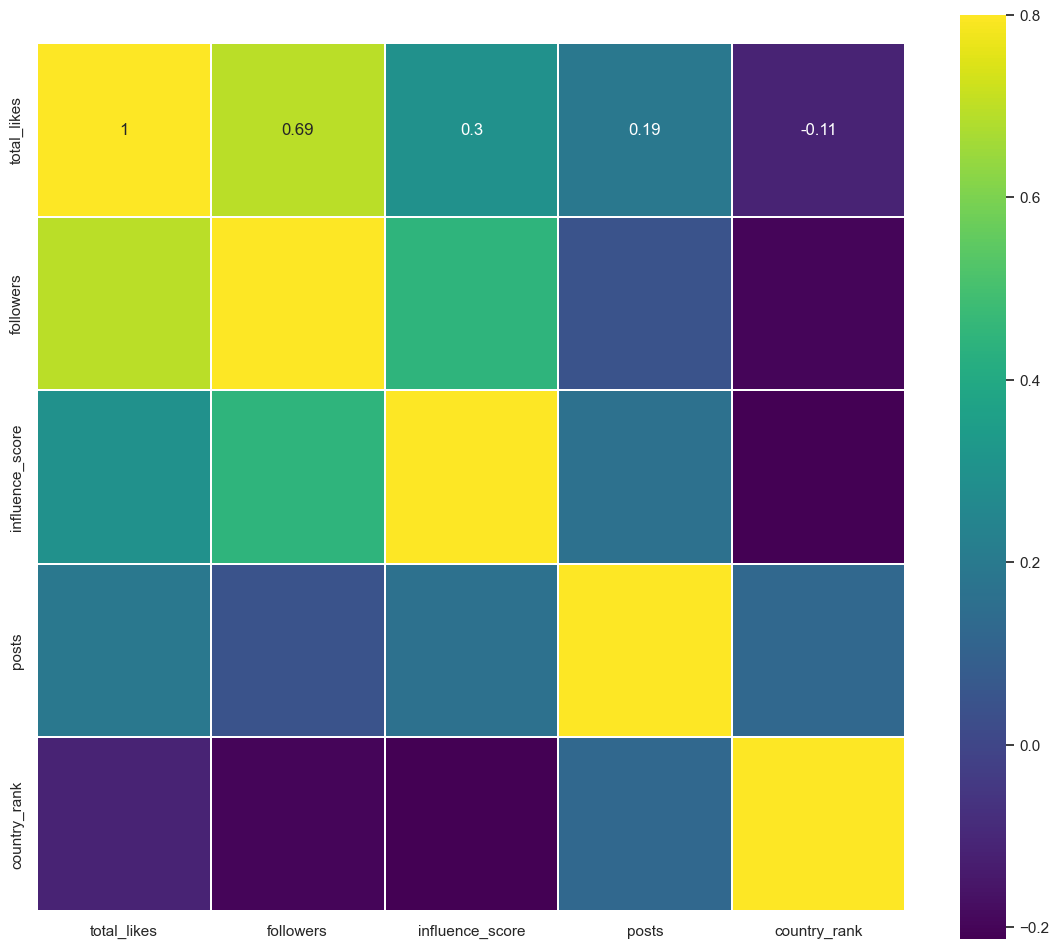

In [107]:
k = 10
cols = correlation.nlargest(k, 'total_likes')['total_likes'].index
print(cols)

# Compute the correlation matrix
cm = np.corrcoef(df_clean[cols].values.T)

# Plotting the heatmap
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, 
            vmax=.8, 
            linewidths=0.01, 
            square=True, 
            annot=True, 
            cmap='viridis', 
            linecolor='white', 
            xticklabels=cols, 
            yticklabels=cols,  # Corrected from yticklabel to yticklabels
            annot_kws={'size': 12})
plt.show()

# There is a moderate correlation between followers and total_likes.